# Evaluation

$$
\langle T_{ij} \rangle = T_i\cdot \frac{m_i\cdot n_j}{(m_i+s_{ij})(m_i+n_j+s_{ij})}
$$
in which:
$$
T_i=\sum_{j\neq i}T_{ij}
$$
and $\langle T_{ij} \rangle$ means tha mean value of $T_{ij}$ within a period of time. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
path = '/Users/paw_paw/Library/CloudStorage/GoogleDrive-keyuqing597@gmail.com/我的云端硬盘/PC5287_M.SC Coursework Thesis for Physics And Technology/data set'

In [3]:
T_i_bus = pd.read_csv(path + '/Total_bus_flux2019.csv').drop(columns='Unnamed: 0')

T_ij_bus= pd.read_csv(path+'/Total_bus_flux_ij2019.csv').drop(columns='Unnamed: 0')

T_i_MRT = pd.read_csv(path + '/Total_MRT_flux2019.csv').drop(columns='Unnamed: 0')

T_ij_MRT = pd.read_csv(path + '/Total_MRT_flux_ij2019.csv').drop(columns='Unnamed: 0')

In [4]:
Prediction = pd.read_csv(path+'/Prediction2019_gpr.csv').drop(columns='Unnamed: 0')

In [5]:
Prediction.set_index('PA_name',inplace=True)

In [6]:
Prediction

,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,JURONG WEST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
PA_name,,,,,,,,,,,,,,,,,,,,,
BUKIT MERAH,4.666840e+06,1.136999e+04,3.769311e+04,0.0,3.480235e+03,1.131059e+04,4.901424e+04,2.719318e+04,4.798556e+04,3.403135e+04,...,67618.972741,134514.467679,0.0,2.650676e+04,3.542918e+04,6281.776852,214394.403657,32.899272,1.486710e+04,1.086539e+04
BUKIT PANJANG,1.230493e+04,2.520233e+06,1.364503e+05,0.0,8.407048e+02,2.211305e+05,6.398392e+04,8.487340e+03,3.919223e+04,3.593549e+04,...,1373.948154,642.986395,0.0,1.953350e+03,7.642319e+03,1765.153553,22769.765683,74.038916,9.609034e+04,2.587158e+04
BUKIT TIMAH,3.685087e+04,9.119385e+04,2.222822e+06,0.0,6.590896e+02,2.510611e+04,1.382593e+05,6.470556e+03,3.192913e+04,1.606942e+04,...,2895.347535,1321.086737,0.0,1.612321e+03,6.071609e+03,1351.377938,26973.849963,23.104799,2.220989e+04,1.013956e+04
CENTRAL WATER CATCHMENT,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
CHANGI,2.532054e+02,1.429601e+02,1.039617e+02,0.0,1.164105e+06,1.849335e+02,2.134934e+02,1.167394e+03,3.566532e+02,3.798030e+02,...,37.479620,70.044381,0.0,4.832779e+02,1.096958e+03,459.625992,680.698800,0.548468,3.455395e+02,3.644700e+02
CHOA CHU KANG,8.696216e+03,4.264176e+05,1.786515e+04,0.0,1.116033e+03,3.591399e+06,4.054148e+04,1.060257e+04,5.629717e+04,1.008612e+05,...,956.097940,666.595137,0.0,2.366021e+03,9.240693e+03,2268.167054,35694.963199,982.190486,1.930994e+05,2.993928e+04
CLEMENTI,6.925405e+04,1.439820e+05,4.841049e+05,0.0,1.516572e+03,7.928808e+04,3.606280e+06,1.317659e+04,7.670004e+05,1.147087e+05,...,4493.206177,2572.042950,0.0,4.491719e+03,1.542793e+04,2903.036361,292134.937609,118.650201,4.016707e+04,1.279406e+04
HOUGANG,5.578704e+04,1.655382e+04,1.475560e+04,0.0,3.126594e+04,1.797158e+04,1.852461e+04,6.003248e+06,2.711828e+04,2.830709e+04,...,10934.272187,9648.460998,0.0,3.972773e+04,4.026953e+05,553858.833984,59858.543510,43.053512,9.177479e+04,1.772212e+05
JURONG EAST,5.289473e+04,1.031333e+05,7.067010e+04,0.0,1.903902e+03,1.082831e+05,7.512737e+05,1.706031e+04,3.698546e+06,4.158800e+05,...,3625.427811,2404.684280,0.0,5.718059e+03,1.810467e+04,3694.762432,641236.152166,261.013403,4.269459e+04,1.256209e+04


In [7]:
def bus_flux(x,y):
    pa1 = Prediction.index[x]
    pa2 = Prediction.index[y]
    
    try:
        return T_ij_bus[(T_ij_bus['ORIGIN_loc']==pa1)&\
                        (T_ij_bus['DESTINATION_loc']==pa2)]['TOTAL_TRIPS'].values[0]
    except:
        return 0

In [8]:
bus = pd.DataFrame(np.zeros((55,55)))

for i in range(0,55):
    for j in range(0,55):
        bus[i][j]=bus_flux(i,j)

In [9]:
def MRT_flux(x,y):
    pa1 = Prediction.index[x]
    pa2 = Prediction.index[y]
    
    try:
        return T_ij_MRT[(T_ij_MRT['ORIGIN_loc']==pa1)&\
                        (T_ij_MRT['DESTINATION_loc']==pa2)]['TOTAL_TRIPS'].values[0]
    except:
        return 0
    
MRT = pd.DataFrame(np.zeros((55,55)))

for i in range(0,55):
    for j in range(0,55):
        MRT[i][j]=MRT_flux(i,j)   

In [10]:
flux = bus+MRT

In [11]:
flux['PA_name']=Prediction.index
flux.set_index('PA_name',inplace=True)

In [12]:
flux.rename(pd.DataFrame(Prediction.index.values).to_dict()[0],axis=1,inplace=True)

In [13]:
flux

,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,JURONG WEST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
PA_name,,,,,,,,,,,,,,,,,,,,,
BUKIT MERAH,3647604.0,37028.0,69751.0,3515.0,24991.0,93665.0,206396.0,135780.0,84688.0,206087.0,...,87490.0,3042.0,0.0,23956.0,199106.0,0.0,0.0,0.0,104221.0,95461.0
BUKIT PANJANG,23974.0,1941872.0,109046.0,8347.0,1385.0,835979.0,43049.0,3146.0,26019.0,66411.0,...,3941.0,33.0,0.0,5052.0,20853.0,0.0,0.0,22092.0,171877.0,45694.0
BUKIT TIMAH,93208.0,173806.0,1020143.0,9563.0,4637.0,21591.0,295442.0,35769.0,44976.0,52227.0,...,12076.0,86.0,0.0,759.0,57953.0,0.0,0.0,0.0,19025.0,25906.0
CENTRAL WATER CATCHMENT,4344.0,324.0,24038.0,5731.0,0.0,15387.0,4074.0,1352.0,2065.0,1521.0,...,0.0,0.0,0.0,0.0,847.0,0.0,0.0,0.0,715.0,17547.0
CHANGI,25839.0,1772.0,4670.0,0.0,141559.0,4903.0,9367.0,27800.0,2067.0,22491.0,...,6294.0,1565.0,0.0,7359.0,63720.0,0.0,0.0,0.0,15030.0,51087.0
CHOA CHU KANG,91449.0,685553.0,36896.0,14794.0,4881.0,2968573.0,99171.0,2555.0,54184.0,249824.0,...,2356.0,879.0,0.0,0.0,28318.0,0.0,0.0,93978.0,293947.0,115633.0
CLEMENTI,212291.0,51679.0,247659.0,2100.0,9768.0,102387.0,1794525.0,12340.0,472997.0,304091.0,...,5204.0,853.0,0.0,1856.0,52553.0,0.0,0.0,0.0,79268.0,26410.0
HOUGANG,126424.0,3098.0,37939.0,3324.0,22438.0,2555.0,14126.0,3329311.0,1722.0,16469.0,...,36390.0,703.0,0.0,10378.0,243158.0,39796.0,0.0,0.0,33811.0,62132.0
JURONG EAST,78678.0,49494.0,44857.0,1209.0,1692.0,22295.0,481303.0,1871.0,1903156.0,758730.0,...,1224.0,167.0,0.0,1229.0,12205.0,0.0,0.0,0.0,21386.0,4074.0


>Fill the missing data with zero. 

In [14]:
flux.fillna(value=0,inplace=True)

In [15]:
Prediction.fillna(value=0,inplace=True)

In [16]:
Z1 = np.log(Prediction).replace(to_replace= float('-inf'),value=0, inplace=False)
Z2 = np.log(flux).replace(to_replace= float('-inf'),value=0, inplace=False)

/Users/paw_paw/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [17]:
Z1.values.min()

-6.836047497822888

In [48]:
Prediction.index

Index(['BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH',
       'CENTRAL WATER CATCHMENT', 'CHANGI', 'CHOA CHU KANG', 'CLEMENTI',
       'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG', 'LIM CHU KANG',
       'MANDAI', 'NOVENA', 'PASIR RIS', 'PIONEER', 'PUNGGOL', 'ANG MO KIO',
       'BEDOK', 'BISHAN', 'BOON LAY', 'BUKIT BATOK', 'QUEENSTOWN', 'SELETAR',
       'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'SOUTHERN ISLANDS',
       'SUNGEI KADUT', 'TAMPINES', 'TANGLIN', 'TENGAH', 'TOA PAYOH', 'TUAS',
       'DOWNTOWN CORE', 'MARINA SOUTH', 'MUSEUM', 'NEWTON', 'ORCHARD',
       'OUTRAM', 'RIVER VALLEY', 'ROCHOR', 'SINGAPORE RIVER', 'STRAITS VIEW',
       'MARINE PARADE', 'GEYLANG', 'PAYA LEBAR', 'WESTERN ISLANDS',
       'WESTERN WATER CATCHMENT', 'WOODLANDS', 'YISHUN'],
      dtype='object', name='PA_name')

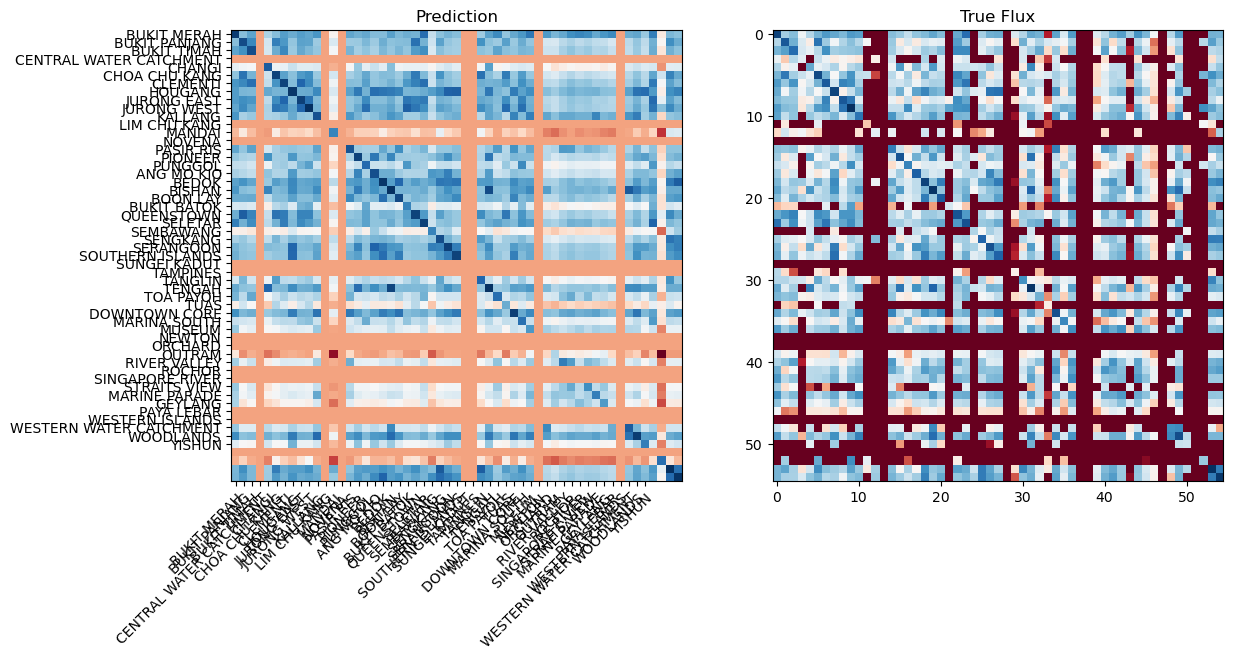

In [59]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches([12.8,9.6])


ax[0].imshow(Z1, cmap='RdBu', interpolation='nearest')
ax[0].set(xticks=np.arange(Prediction.shape[0]), xticklabels=Prediction.index ,\
          yticks=np.arange(Prediction.shape[1]), yticklabels=Prediction.index ,\
          title='Prediction',autoscale_on=True)

plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax[1].imshow(Z2, cmap='RdBu', interpolation='nearest')
ax[1].set(title='True Flux')
'''
c=ax[0].pcolormesh(Z1, cmap='RdBu', vmin=Z1.values.min(), vmax=Z1.values.max())


fig.colorbar(c, ax=ax[0])'''

fig.savefig(path+'/Prediction_2019.png')

plt.show()

In [19]:
ax[0]

<AxesSubplot: title={'center': 'Prediction'}>

## Metrics To Evaluate

>Delete the planning areas with empty data.

In [21]:
def erase_pre(empty_pa):
    return Prediction.drop(columns=empty_pa)[Prediction.index!=empty_pa]

In [22]:
def erase_true(empty_pa):
    return flux.drop(columns=empty_pa)[flux.index!=empty_pa]

In [23]:
for pa in ['NORTH-EASTERN ISLANDS','SIMPANG',\
           'MARINA EAST','MARINA SOUTH','ORCHARD',\
           'OUTRAM','STRAITS VIEW','CHANGI BAY','WESTERN ISLANDS']:
    
    if sum(Prediction[Prediction.index==pa].values[0])==0\
    and sum(Prediction[pa].values)==0\
    and sum(flux[Prediction.index==pa].values[0])==0\
    and sum(flux[pa].values)==0:
        
        Prediction = erase_pre(pa)
        flux = erase_true(pa)

In [24]:
Prediction.shape

(51, 51)

In [25]:
flux.shape

(51, 51)

|index|Planning Area|
| --- | --- |
|0|NORTH-EASTERN ISLANDS|
|1|SIMPANG| 
|2|MARINA EAST|
|3|MARINA SOUTH|
|4|ORCHARD|
|5|OUTRAM|
|6|STRAITS VIEW|
|7|CHANGI BAY|
|8|WESTERN ISLANDS|

### R2_score

In [26]:
from sklearn.metrics import r2_score

> Fill the diagonal of the Prediction with the actual data.

In [27]:
np.fill_diagonal(Prediction.values,np.diagonal(flux))

In [28]:
np.diagonal(flux)

array([3.647604e+06, 1.941872e+06, 1.020143e+06, 5.731000e+03,
       1.415590e+05, 2.968573e+06, 1.794525e+06, 3.329311e+06,
       1.903156e+06, 6.205365e+06, 7.556300e+05, 2.960000e+02,
       5.533000e+03, 5.730480e+05, 2.229105e+06, 4.515630e+05,
       1.523354e+06, 3.526617e+06, 5.547397e+06, 1.655423e+06,
       9.964000e+03, 2.154812e+06, 2.298965e+06, 2.613900e+04,
       1.366375e+06, 2.350340e+06, 1.385521e+06, 1.671000e+03,
       2.817450e+05, 5.497755e+06, 1.020420e+05, 1.447000e+03,
       2.529571e+06, 4.012680e+05, 2.814310e+05, 0.000000e+00,
       0.000000e+00, 3.648800e+04, 1.383050e+05, 7.843400e+04,
       7.088000e+03, 1.225470e+05, 3.724000e+03, 0.000000e+00,
       2.940620e+05, 2.550736e+06, 1.274800e+04, 0.000000e+00,
       4.484600e+04, 6.333523e+06, 4.778323e+06])

In [29]:
np.diagonal(Prediction)

array([3.647604e+06, 1.941872e+06, 1.020143e+06, 5.731000e+03,
       1.415590e+05, 2.968573e+06, 1.794525e+06, 3.329311e+06,
       1.903156e+06, 6.205365e+06, 7.556300e+05, 2.960000e+02,
       5.533000e+03, 5.730480e+05, 2.229105e+06, 4.515630e+05,
       1.523354e+06, 3.526617e+06, 5.547397e+06, 1.655423e+06,
       9.964000e+03, 2.154812e+06, 2.298965e+06, 2.613900e+04,
       1.366375e+06, 2.350340e+06, 1.385521e+06, 1.671000e+03,
       2.817450e+05, 5.497755e+06, 1.020420e+05, 1.447000e+03,
       2.529571e+06, 4.012680e+05, 2.814310e+05, 0.000000e+00,
       0.000000e+00, 3.648800e+04, 1.383050e+05, 7.843400e+04,
       7.088000e+03, 1.225470e+05, 3.724000e+03, 0.000000e+00,
       2.940620e+05, 2.550736e+06, 1.274800e+04, 0.000000e+00,
       4.484600e+04, 6.333523e+06, 4.778323e+06])

> R2_score

In [30]:
R2=r2_score(flux,Prediction)

In [31]:
R2

-76.61837564005417

### Adjusted R-Squared

In [32]:
n=flux.size
p=4 #T_i,m_i,n_j,s_ij

In [33]:
# n = number of sample size
# p = number of independent variables

Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

In [34]:
Adj_r2

-76.73797252085548

### Relative error

In [148]:
err = (Prediction-flux).abs()

In [40]:
err

,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,JURONG WEST,...,ROCHOR,SINGAPORE RIVER,STRAITS VIEW,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
PA_name,,,,,,,,,,,,,,,,,,,,,
BUKIT MERAH,0.000000,25658.007493,32057.893534,3515.0,21510.765295,82354.409771,157381.761500,108586.820818,36702.439773,172055.646358,...,224007.139492,19871.027259,131472.467679,2.550763e+03,163676.822483,6281.776852,214394.403657,32.899272,89353.898596,84595.607599
BUKIT PANJANG,11669.072395,0.000000,27404.285148,8347.0,544.295241,614848.533605,20934.915310,5341.340273,13173.233630,30475.510115,...,22550.671575,2567.051846,609.986395,3.098650e+03,13210.680633,1765.153553,22769.765683,22017.961084,75786.657664,19822.416082
BUKIT TIMAH,56357.129165,82612.153388,0.000000,9563.0,3977.910397,3515.108967,157182.742802,29298.444271,13046.874422,36157.584546,...,75093.893858,9180.652465,1235.086737,8.533215e+02,51881.390790,1351.377938,26973.849963,23.104799,3184.887200,15766.441599
CENTRAL WATER CATCHMENT,4344.000000,324.000000,24038.000000,0.0,0.000000,15387.000000,4074.000000,1352.000000,2065.000000,1521.000000,...,832.000000,0.000000,0.000000,0.000000e+00,847.000000,0.000000,0.000000,0.000000,715.000000,17547.000000
CHANGI,25585.794606,1629.039924,4566.038266,0.0,0.000000,4718.066503,9153.506587,26632.606329,1710.346830,22111.196953,...,46754.140852,6256.520380,1494.955619,6.875722e+03,62623.042304,459.625992,680.698800,0.548468,14684.460467,50722.529961
CHOA CHU KANG,82752.783930,259135.431025,19030.846055,14794.0,3764.967085,0.000000,58629.517545,8047.567529,2113.165964,148962.835627,...,20259.769701,1399.902060,212.404863,2.366021e+03,19077.307216,2268.167054,35694.963199,92995.809514,100847.619739,85693.721697
CLEMENTI,143036.947247,92302.966018,236445.889471,2100.0,8251.427691,23098.916751,0.000000,836.590022,294003.391474,189382.338093,...,47707.719140,710.793823,1719.042950,2.635719e+03,37125.074568,2903.036361,292134.937609,118.650201,39100.933350,13615.939434
HOUGANG,70636.964856,13455.823930,23183.396272,3324.0,8827.941394,15416.582756,4398.609582,0.000000,25396.284252,11838.091777,...,104261.710101,25455.727813,8945.460998,2.934973e+04,159537.285793,514062.833984,59858.543510,43.053512,57963.788551,115089.239654
JURONG EAST,25783.271806,53639.280150,25813.100964,1209.0,211.902135,85988.062735,269970.743649,15189.307369,0.000000,342849.953815,...,9232.834113,2401.427811,2237.684280,4.489059e+03,5899.668584,3694.762432,641236.152166,261.013403,21308.587563,8488.088994


In [151]:
rlt_err = (err/Prediction).abs()

In [152]:
rlt_err_aprx=rlt_err.replace([np.inf], np.nan,inplace=False)

In [153]:
rlt_err_aprx=rlt_err_aprx.fillna(0)

In [154]:
for i in range(0,51):
    for j in range(0,51):
        if rlt_err_aprx.values[i,j]>=0.8:
            rlt_err_aprx.values[i,j]=1
        else:
            rlt_err_aprx.values[i,j]=0

In [155]:
rlt_err_aprx

,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,JURONG WEST,...,ROCHOR,SINGAPORE RIVER,STRAITS VIEW,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
PA_name,,,,,,,,,,,,,,,,,,,,,
BUKIT MERAH,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
BUKIT PANJANG,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
BUKIT TIMAH,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
CENTRAL WATER CATCHMENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHANGI,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CHOA CHU KANG,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
CLEMENTI,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
HOUGANG,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
JURONG EAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


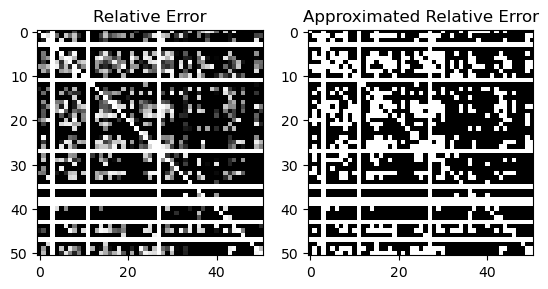

In [178]:
fig, ax = plt.subplots(1,2)

z1 = rlt_err
z2 = rlt_err_aprx


ax[0].imshow(z1, cmap='Greys', interpolation='nearest',vmin=0, vmax=1)
ax[0].set(title='Relative Error',autoscale_on=True)

ax[1].imshow(z2, cmap='Greys', interpolation='nearest',vmin=0, vmax=1)
ax[1].set(title='Approximated Relative Error',autoscale_on=True)

plt.show()

相对误差大于80%视为无效,小于视为有效。

In [179]:
sum(sum(rlt_err_aprx.values))/rlt_err.size

0.5767012687427913

57%都无效。